In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 200)
import seaborn as sns

# Key Results of This Notebook
## Data Cleaning and Validation
- Drop unnecessary columns
- Reduce file size
- Valid the Data is good
- Create Data Dictionary

In [2]:
# keep only 2021 records
df0 = pd.read_csv('/Users/lyndon/Documents/projects/ow/input/phs_2021.csv')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031558 entries, 0 to 1031557
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   start_time        1031558 non-null  object 
 1   esports_match_id  1031558 non-null  int64  
 2   tournament_title  1031558 non-null  object 
 3   map_type          1031558 non-null  object 
 4   map_name          1031558 non-null  object 
 5   player_name       1031558 non-null  object 
 6   team_name         1031558 non-null  object 
 7   stat_name         996093 non-null   object 
 8   hero_name         1031558 non-null  object 
 9   stat_amount       1031558 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.7+ MB


In [4]:
df0.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


In [5]:
df0.isnull().sum()

start_time              0
esports_match_id        0
tournament_title        0
map_type                0
map_name                0
player_name             0
team_name               0
stat_name           35465
hero_name               0
stat_amount             0
dtype: int64

In [6]:
# check columns one by one

In [7]:
# start_time: keep for now, easy to identify which game, may use to validate stats like time_alive, etc; after that, might just keep the date
df0['start_time'].map(lambda x:x[:11]).value_counts().sort_index()

2021-04-16     10500
2021-04-17     27517
2021-04-18     24543
2021-04-19      2063
2021-04-23      6936
2021-04-24     20512
2021-04-25     19811
2021-04-29      7552
2021-04-30     25530
2021-05-01     22020
2021-05-02     25925
2021-05-03       995
2021-05-07     11955
2021-05-08     14400
2021-05-09      7467
2021-05-21      8936
2021-05-22     25304
2021-05-23     23102
2021-05-28      6535
2021-05-29     20552
2021-05-30     19893
2021-06-03     10148
2021-06-04     24404
2021-06-05     23657
2021-06-06     18524
2021-06-07       965
2021-06-11      6558
2021-06-12     10737
2021-06-13      6301
2021-06-25     10347
2021-06-26     29635
2021-06-27     27708
2021-06-28      1013
2021-07-02      9017
2021-07-03     22906
2021-07-04     23030
2021-07-08      6732
2021-07-09     27914
2021-07-10     28097
2021-07-11     24669
2021-07-12      5789
2021-07-16      9108
2021-07-17     16663
2021-07-18      6562
2021-07-30      8231
2021-07-31     27980
2021-08-01     28610
2021-08-06   

In [8]:
# esports_match_id
# convert to str since it has no numeric meaning
df0['esports_match_id']=df0['esports_match_id'].astype('str')

In [9]:
# tournament_title
df0['tournament_title'].value_counts()

OWL 2021    1031558
Name: tournament_title, dtype: int64

In [10]:
# delete tournament_title since it does not provide any additional info
df0.drop('tournament_title', axis=1,inplace=True)

In [11]:
# map_type&map_name
# all the map_type and map_name are correct; no specific round map name
df0['map_type'].value_counts()

CONTROL    333876
HYBRID     246547
ASSAULT    245755
PAYLOAD    205380
Name: map_type, dtype: int64

In [12]:
df0['map_name'].value_counts()

Hanamura                 87886
Temple of Anubis         82872
King's Row               80767
Volskaya Industries      74997
Lijiang Tower            71153
Busan                    68266
Oasis                    67356
Ilios                    66338
Nepal                    60763
Numbani                  47981
Eichenwalde              47683
Blizzard World           39858
Havana                   39270
Route 66                 36011
Dorado                   34896
Watchpoint: Gibraltar    33125
Rialto                   31305
Junkertown               30773
Hollywood                30258
Name: map_name, dtype: int64

In [13]:
df0[['map_type','map_name']].drop_duplicates(keep='first').sort_values(by='map_type').reset_index()

,index,map_type,map_name
0,4062,ASSAULT,Volskaya Industries
1,9178,ASSAULT,Hanamura
2,14085,ASSAULT,Temple of Anubis
3,0,CONTROL,Busan
4,5309,CONTROL,Ilios
5,55617,CONTROL,Nepal
6,20436,CONTROL,Oasis
7,10500,CONTROL,Lijiang Tower
8,242472,HYBRID,Hollywood
9,233419,HYBRID,Numbani


In [14]:
# player_name
# validated with liquidpedia
df0[['team_name','player_name']].drop_duplicates(keep='first').sort_values(by='team_name').reset_index(drop=True)

,team_name,player_name
0,Atlanta Reign,Gator
1,Atlanta Reign,Edison
2,Atlanta Reign,Hawk
3,Atlanta Reign,Masaa
4,Atlanta Reign,PELICAN
5,Atlanta Reign,ir1s
6,Atlanta Reign,Kai
7,Boston Uprising,Faith
8,Boston Uprising,Stand1
9,Boston Uprising,Valentine


In [15]:
# hero_name
df0['hero_name'].value_counts()

All Heroes       276619
D.Va              67871
Wrecking Ball     54227
Tracer            51456
Ana               47291
Brigitte          44460
Baptiste          42404
Lúcio             40784
Winston           38940
Echo              30089
McCree            28965
Sombra            26395
Zenyatta          26363
Symmetra          22277
Mercy             20979
Mei               20436
Orisa             20109
Ashe              19094
Zarya             17858
Reinhardt         17850
Hanzo             17598
Sigma             15069
Moira             14569
Reaper            14482
Widowmaker        11868
Doomfist           9432
Pharah             9266
Soldier: 76        8601
Genji              6715
Torbjörn           6355
Roadhog            1888
Junkrat             892
Bastion             356
Name: hero_name, dtype: int64

In [16]:
# all heroes is the aggreated data for a given player
df0[df0['hero_name']=='All Heroes']

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000
...,...,...,...,...,...,...,...,...,...
1031468,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Turrets Destroyed,All Heroes,1.000000
1031469,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Ultimates Earned - Fractional,All Heroes,6.404276
1031470,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Ultimates Used,All Heroes,5.000000
1031471,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Weapon Accuracy,All Heroes,0.260870


In [17]:
df1=df0[df0['hero_name']!='All Heroes']

In [18]:
df1.columns

Index(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name', 'hero_name', 'stat_amount'],
      dtype='object')

In [19]:
res1 = df1.groupby(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name']).agg({'stat_amount':'sum'}).reset_index()
res1['hero_name']='All Heroes'
res1.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount,hero_name
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,All Damage Done,11070.553071,All Heroes
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Amplification Matrix Casts,2.000000,All Heroes
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Assists,15.000000,All Heroes
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,All Heroes
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Barrier Damage Done,3125.426678,All Heroes


In [20]:
res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534126 entries, 0 to 534125
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        534126 non-null  object 
 1   esports_match_id  534126 non-null  object 
 2   map_type          534126 non-null  object 
 3   map_name          534126 non-null  object 
 4   player_name       534126 non-null  object 
 5   team_name         534126 non-null  object 
 6   stat_name         534126 non-null  object 
 7   stat_amount       534126 non-null  float64
 8   hero_name         534126 non-null  object 
dtypes: float64(1), object(8)
memory usage: 36.7+ MB


In [21]:
res2 = res1.merge(df0, how='inner', on=['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name','hero_name'])
res2.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,All Damage Done,11070.553071,All Heroes,11070.553071
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Assists,15.000000,All Heroes,15.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,All Heroes,116.376781
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Barrier Damage Done,3125.426678,All Heroes,3125.426678
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Damage - Quick Melee,30.000000,All Heroes,30.000000


In [22]:
res3 = res2[res2['stat_amount_x']!=res2['stat_amount_y']].reset_index(drop=True)

In [23]:
res3.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,All Heroes,116.376781
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Barrier Damage Done,3125.426678,All Heroes,3125.426678
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Healing Done,12441.789915,All Heroes,12441.789915
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Hero Damage Done,7945.126393,All Heroes,7945.126393
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Objective Time,6.489000,All Heroes,6.489000


In [24]:
res3.iloc[2,7]

12441.789914548397

In [25]:
res3.iloc[2,9]

12441.789914548395

In [26]:
res3['diff_percent'] = (res3['stat_amount_x'] - res3['stat_amount_y'])/res3['stat_amount_x']

In [27]:
res3['diff_percent'].describe()

count    4.257800e+04
mean     2.209363e-01
std      5.781483e-01
min     -5.659737e+01
25%     -1.259820e-16
50%      1.823343e-16
75%      5.000000e-01
max      9.592245e-01
Name: diff_percent, dtype: float64

<AxesSubplot:xlabel='diff_percent', ylabel='stat_name'>

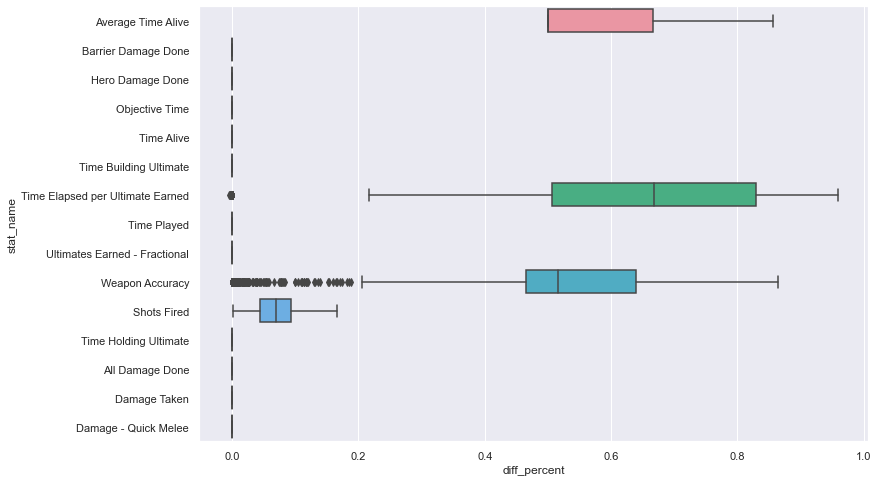

In [28]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.boxplot(x='diff_percent', y='stat_name',data=res3[~res3['stat_name'].isin(['Healing Done','Damage Blocked'])])

<AxesSubplot:xlabel='diff_percent', ylabel='stat_name'>

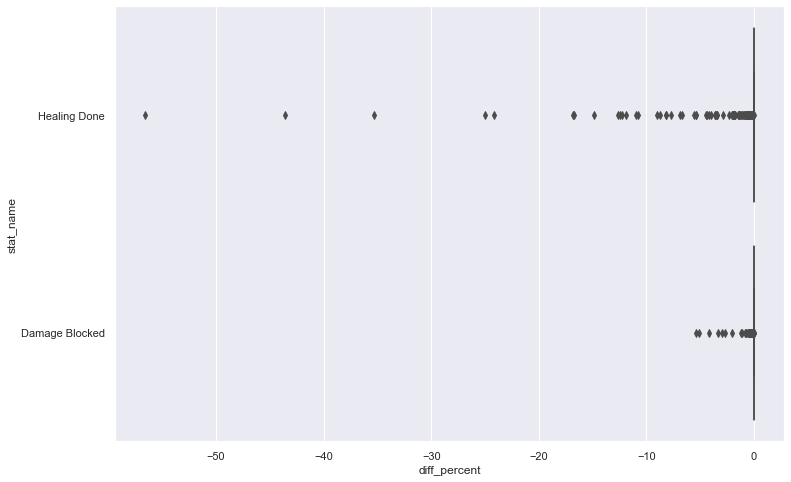

In [29]:
sns.boxplot(x='diff_percent', y='stat_name',data=res3[res3['stat_name'].isin(['Healing Done','Damage Blocked'])])

### problematic stats:
1. off by a lot
    - Average Time Alive
    - Time Elapsed per Utimate Earned
    - Weapon Accuracy
    - Shots Fired
2. off by some outliers
    - Healing Done
    - Damage Blocked

#### assumptions:
1. some stats are hero specific, e.g. shots fired, 'sum' might not work in aggregation
2. some involves calculation with other field, e.g. average time alive, might use 'average' in aggregation

In [30]:
res3['stat_name'].value_counts()

Time Elapsed per Ultimate Earned    6637
Average Time Alive                  6046
Weapon Accuracy                     4006
Ultimates Earned - Fractional       3145
Time Alive                          3049
Time Building Ultimate              2985
Time Played                         2425
Objective Time                      2349
Damage Taken                        2343
Time Holding Ultimate               2058
All Damage Done                     1955
Hero Damage Done                    1913
Barrier Damage Done                 1528
Healing Done                         794
Shots Fired                          685
Damage Blocked                       452
Damage - Quick Melee                 208
Name: stat_name, dtype: int64

#### Investigate Average Time Alive

In [65]:
df2=df0[(df0['hero_name']!='All Heroes')&(df0['stat_name'].isin(['Average Time Alive','Time Elapsed per Utimate Earned','Weapon Accuracy','Shots Fired']))]

In [66]:
df2.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
26,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Echo,16.881001
36,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Shots Fired,Echo,6.000000
37,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Shots Fired,Echo,108.000000
48,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Weapon Accuracy,Echo,0.183673
51,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Mei,57.154502


In [71]:
res4 = df2.groupby(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name']).agg({'stat_amount':'mean'}).reset_index()
res4['hero_name'] = 'All Heroes'

In [72]:
res4.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount,hero_name
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,116.376781,All Heroes
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Shots Fired,242.666667,All Heroes
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Weapon Accuracy,0.367707,All Heroes
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Average Time Alive,71.934669,All Heroes
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Shots Fired,1498.000000,All Heroes


In [31]:
res3[res3['stat_name']=='Average Time Alive']

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y,diff_percent
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,All Heroes,116.376781,0.666667
11,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Average Time Alive,215.804007,All Heroes,71.934669,0.666667
22,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,282.405509,All Heroes,56.481102,0.800000
29,2021-04-16 19:08:52,37234,CONTROL,Busan,FEARLESS,Dallas Fuel,Average Time Alive,123.002893,All Heroes,41.000964,0.666667
36,2021-04-16 19:08:52,37234,CONTROL,Busan,Fielder,Dallas Fuel,Average Time Alive,182.493005,All Heroes,60.831002,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
42546,2021-09-26 02:53:59,37441,PAYLOAD,Havana,LIP,Shanghai Dragons,Average Time Alive,174.748805,All Heroes,87.374403,0.500000
42552,2021-09-26 02:53:59,37441,PAYLOAD,Havana,LeeJaeGon,Shanghai Dragons,Average Time Alive,287.125309,All Heroes,143.562654,0.500000
42557,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Masaa,Atlanta Reign,Average Time Alive,143.547338,All Heroes,71.773669,0.500000
42564,2021-09-26 02:53:59,37441,PAYLOAD,Havana,PELICAN,Atlanta Reign,Average Time Alive,358.003654,All Heroes,71.600731,0.800000


In [73]:
res5 = res4.merge(df0, how='inner', on=['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name','hero_name'])
res5.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,116.376781,All Heroes,116.376781
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Shots Fired,242.666667,All Heroes,728.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Weapon Accuracy,0.367707,All Heroes,0.357422
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Average Time Alive,71.934669,All Heroes,71.934669
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Shots Fired,1498.000000,All Heroes,5914.000000


In [74]:
res5['diff_percent'] = (res5['stat_amount_x'] - res5['stat_amount_y'])/res5['stat_amount_x']

<AxesSubplot:xlabel='diff_percent', ylabel='stat_name'>

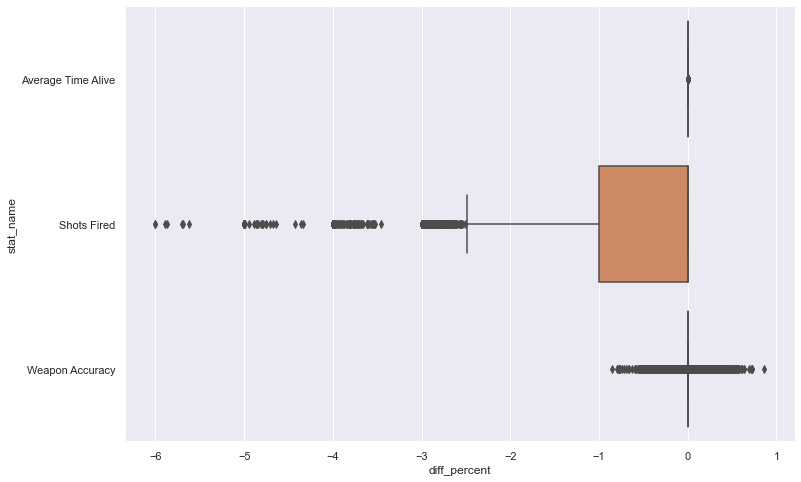

In [75]:
sns.boxplot(x='diff_percent', y='stat_name',data=res5)

### conclusion 1:
- the when hero_name = All Heroes, the average time alive is aggreated by 'mean'
- shots fired is not aggreated by either 'sum' or 'mean'??? doesn't make sense
- when aggregated by 'mean', weapon accuracy has the same bahavior as the others above(many outliers)

In [8]:
def investigate_stat(stat_list, agg_method,base_df):
    """
    use to investigate into unusnal columns
    """
    # new df with only hero_name != 'All Heroes' and stat_name in selected stat_list
    new_df = base_df[(base_df['hero_name']!='All Heroes') & (base_df['stat_name'].isin(stat_list))]
    grouped = new_df.groupby(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name']).agg({'stat_amount':agg_method}).reset_index()
    grouped['hero_name'] = 'All Heroes'
    # compare
    compared = grouped.merge(base_df, how='inner',on=['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'stat_name','hero_name'])
    compared['diff_percent'] = (compared['stat_amount_x'] - compared['stat_amount_y'])/compared['stat_amount_x']
    sns.barplot(x='diff_percent', y='stat_name',data=compared)
    return compared

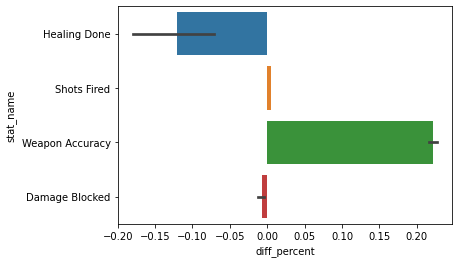

In [9]:
c1 = investigate_stat(['Shots Fired','Weapon Accuracy','Healing Done','Damage Blocked'],'sum',df0)

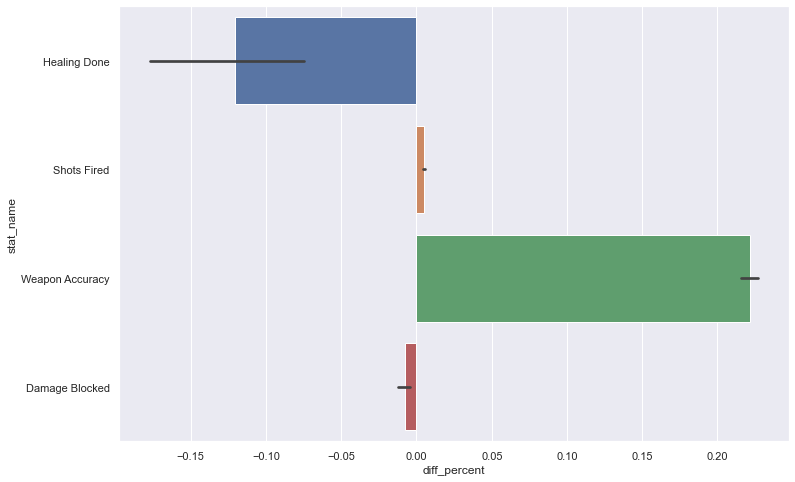

In [128]:
c1 = investigate_stat(['Shots Fired','Weapon Accuracy','Healing Done','Damage Blocked'],'sum',df0)

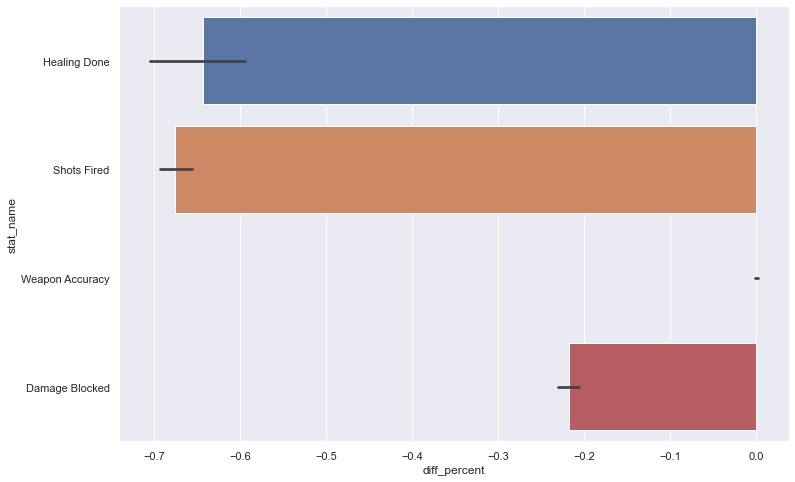

In [116]:
c2 = investigate_stat(['Shots Fired','Weapon Accuracy','Healing Done','Damage Blocked'],'mean',df0)

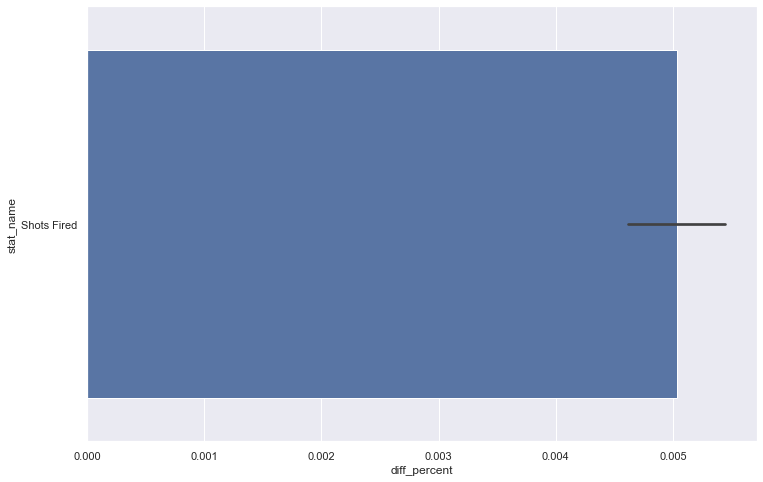

In [120]:
c3 = investigate_stat(['Shots Fired'],'sum',df0)

In [10]:
stat_list = ['All Damage Done',
 'Assists',
 'Average Time Alive',
 'Barrier Damage Done',
 'Damage Taken',
 'Deaths',
 'Eliminations',
 'Environmental Deaths',
 'Final Blows',
 'Healing Received',
 'Hero Damage Done',
 'Multikills',
 'Objective Kills',
 'Objective Time',
 'Solo Kills',
 'Time Alive',
 'Time Building Ultimate',
 'Time Discorded',
 'Time Elapsed per Ultimate Earned',
 'Time Hacked',
 'Time Holding Ultimate',
 'Time Played',
 'Ultimates Earned - Fractional',
 'Ultimates Used',
 'Weapon Accuracy',
 'Healing Done']

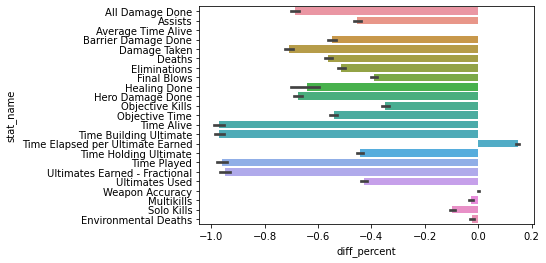

In [11]:
c4=investigate_stat(stat_list,'mean',df0)

<AxesSubplot:xlabel='diff_percent', ylabel='Count'>

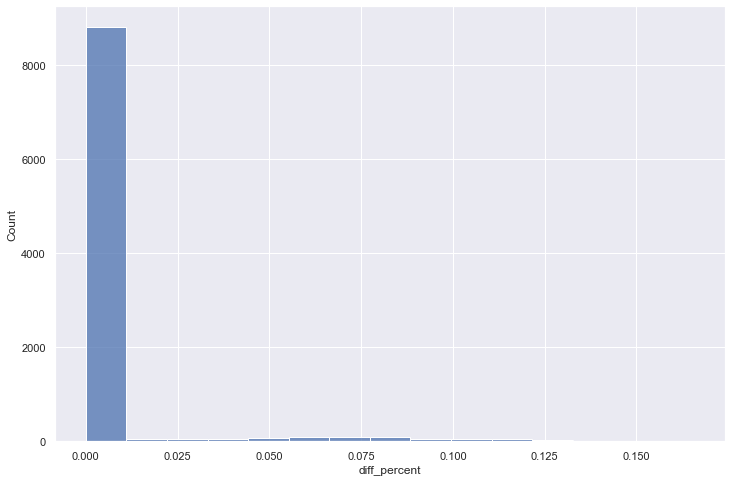

In [122]:
sns.histplot(x='diff_percent',data=c3)

In [123]:
c3[c3['diff_percent']>0.025]

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y,diff_percent
34,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Danteh,Houston Outlaws,Shots Fired,4872.0,All Heroes,4680.0,0.039409
35,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Doha,Dallas Fuel,Shots Fired,3346.0,All Heroes,3154.0,0.057382
44,2021-04-16 20:53:04,37234,CONTROL,Ilios,Danteh,Houston Outlaws,Shots Fired,1942.0,All Heroes,1697.0,0.126159
45,2021-04-16 20:53:04,37234,CONTROL,Ilios,Doha,Dallas Fuel,Shots Fired,1878.0,All Heroes,1610.0,0.142705
53,2021-04-16 21:30:40,37233,CONTROL,Ilios,MirroR,Los Angeles Gladiators,Shots Fired,4369.0,All Heroes,3928.0,0.100938
...,...,...,...,...,...,...,...,...,...,...,...
9329,2021-09-24 05:22:38,37430,PAYLOAD,Dorado,Doha,Dallas Fuel,Shots Fired,2800.0,All Heroes,2716.0,0.030000
9356,2021-09-25 01:28:47,37444,ASSAULT,Hanamura,PELICAN,Atlanta Reign,Shots Fired,3195.0,All Heroes,2949.0,0.076995
9444,2021-09-26 01:25:54,37441,ASSAULT,Hanamura,PELICAN,Atlanta Reign,Shots Fired,2580.0,All Heroes,2286.0,0.113953
9456,2021-09-26 01:51:30,37441,HYBRID,King's Row,PELICAN,Atlanta Reign,Shots Fired,3349.0,All Heroes,3211.0,0.041206


In [131]:
df0[(df0['esports_match_id']=='37234')&(df0['player_name']=='Danteh')&(df0['stat_name']=='Shots Fired')&(df0['map_name']=='Volskaya Industries')].sort_values(by='hero_name')

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
4799,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Danteh,Houston Outlaws,Shots Fired,All Heroes,4680.0
4838,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Danteh,Houston Outlaws,Shots Fired,Echo,192.0
4839,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Danteh,Houston Outlaws,Shots Fired,Echo,1650.0
4886,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Danteh,Houston Outlaws,Shots Fired,Tracer,3030.0


## !!!Base dataset has some problems
#### should investigate the stat_name

In [4]:
# check duplication
df0[df0[['start_time','esports_match_id','map_type','map_name','player_name','team_name','stat_name','hero_name']].duplicated()].sort_values(by=['start_time','esports_match_id','map_type','map_name','player_name','team_name','stat_name','hero_name'])

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
928,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Danteh,Houston Outlaws,Shots Fired,Echo,78.000000
73,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Self Healing,Mei,23.333337
37,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Shots Fired,Echo,108.000000
231,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,FEARLESS,Dallas Fuel,Melee Kills,Winston,6.000000
1238,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,JJANGGU,Houston Outlaws,Melee Kills,Winston,7.000000
...,...,...,...,...,...,...,...,...,...,...
1031509,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Sigma,1.082795
1031510,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Sigma,0.541397
1031556,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.459524
1031557,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.459524


In [5]:
df0.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


In [7]:
df0[(df0['player_name']=='Danteh')&df0.duplicated(keep='first')].sort_values(by=['start_time','esports_match_id','map_type','map_name','player_name','team_name','stat_name','hero_name'])

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
2304,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Self Healing,Mei,636.260499
3462,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,Danteh,Houston Outlaws,Self Healing,Mei,293.801286
50572,2021-04-18 19:23:13,37229,OWL 2021,HYBRID,Blizzard World,Danteh,Houston Outlaws,Self Healing,Mei,1791.578108
52540,2021-04-18 20:14:43,37229,OWL 2021,ASSAULT,Temple of Anubis,Danteh,Houston Outlaws,Self Healing,Mei,809.341017
53550,2021-04-18 20:35:26,37229,OWL 2021,CONTROL,Oasis,Danteh,Houston Outlaws,Self Healing,Mei,329.686995
54458,2021-04-18 20:52:56,37229,OWL 2021,PAYLOAD,Havana,Danteh,Houston Outlaws,Self Healing,Mei,463.637830
79534,2021-04-24 19:06:01,37224,OWL 2021,CONTROL,Nepal,Danteh,Houston Outlaws,Shots Hit,Symmetra,1.000000
79536,2021-04-24 19:06:01,37224,OWL 2021,CONTROL,Nepal,Danteh,Houston Outlaws,Shots Missed,Symmetra,1.000000
82680,2021-04-24 20:24:21,37224,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Self Healing,Mei,816.455814
191185,2021-05-02 23:20:22,37147,OWL 2021,CONTROL,Busan,Danteh,Houston Outlaws,Self Healing,Mei,204.974391


In [145]:
df0.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


<AxesSubplot:xlabel='stat_amount_x', ylabel='Count'>

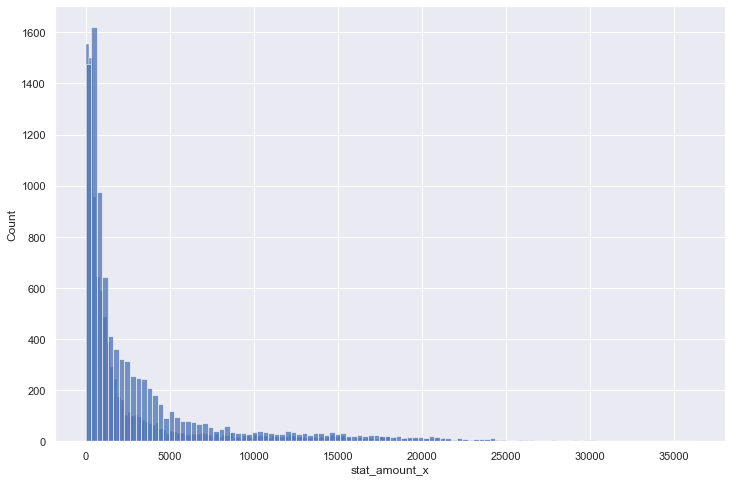

In [86]:
sns.histplot(x='stat_amount_x',data=res5[res5['stat_name']=='Shots Fired'])
sns.histplot(x='stat_amount_y',data=res5[res5['stat_name']=='Shots Fired'])

In [32]:
res3[res3['stat_name'].isin(['Damage Doen','Damage - Quick Melee']) & res3['diff_percent']>0.5]

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y,diff_percent
182,2021-04-16 19:56:41,37234,PAYLOAD,Havana,Hanbin,Dallas Fuel,Damage - Quick Melee,116.155567,All Heroes,116.155567,1.223433e-16
255,2021-04-16 20:27:21,37234,ASSAULT,Volskaya Industries,Hanbin,Dallas Fuel,Damage - Quick Melee,39.266802,All Heroes,39.266802,-1.809525e-16
409,2021-04-16 22:50:23,37233,ASSAULT,Hanamura,Choihyobin,San Francisco Shock,Damage - Quick Melee,95.717278,All Heroes,95.717278,-1.484670e-16
809,2021-04-17 11:09:41,37255,HYBRID,King's Row,Leave,Chengdu Hunters,Damage - Quick Melee,215.013096,All Heroes,215.013096,1.321859e-16
874,2021-04-17 11:35:51,37255,PAYLOAD,Havana,MoLanran,Los Angeles Valiant,Damage - Quick Melee,146.764996,All Heroes,146.764996,1.936546e-16
...,...,...,...,...,...,...,...,...,...,...,...
40980,2021-09-23 03:16:14,37447,ASSAULT,Volskaya Industries,SP9RK1E,Dallas Fuel,Damage - Quick Melee,268.381807,All Heroes,268.381807,2.118006e-16
41045,2021-09-23 03:42:21,37447,HYBRID,Eichenwalde,SP9RK1E,Dallas Fuel,Damage - Quick Melee,228.499985,All Heroes,228.499985,1.243839e-16
41955,2021-09-24 04:54:15,37430,HYBRID,Numbani,SP9RK1E,Dallas Fuel,Damage - Quick Melee,537.101013,All Heroes,537.101013,-2.116675e-16
42440,2021-09-26 01:51:30,37441,HYBRID,King's Row,Fleta,Shanghai Dragons,Damage - Quick Melee,202.425673,All Heroes,202.425673,-1.404057e-16


In [33]:
res3[res3['diff_percent']>0.5]

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,hero_name,stat_amount_y,diff_percent
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,All Heroes,116.376781,0.666667
7,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Time Elapsed per Ultimate Earned,244.949353,All Heroes,82.020763,0.665152
10,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Weapon Accuracy,1.103121,All Heroes,0.357422,0.675990
11,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Average Time Alive,215.804007,All Heroes,71.934669,0.666667
16,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Time Elapsed per Ultimate Earned,573.941101,All Heroes,67.275978,0.882782
...,...,...,...,...,...,...,...,...,...,...,...
42561,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Masaa,Atlanta Reign,Time Elapsed per Ultimate Earned,496.201162,All Heroes,129.975385,0.738059
42564,2021-09-26 02:53:59,37441,PAYLOAD,Havana,PELICAN,Atlanta Reign,Average Time Alive,358.003654,All Heroes,71.600731,0.800000
42568,2021-09-26 02:53:59,37441,PAYLOAD,Havana,PELICAN,Atlanta Reign,Time Elapsed per Ultimate Earned,536.735333,All Heroes,112.354636,0.790670
42570,2021-09-26 02:53:59,37441,PAYLOAD,Havana,PELICAN,Atlanta Reign,Weapon Accuracy,1.446710,All Heroes,0.263739,0.817697


In [34]:
res3['diff_percent']>0.1

0         True
1        False
2        False
3        False
4        False
         ...  
42573    False
42574    False
42575    False
42576     True
42577    False
Name: diff_percent, Length: 42578, dtype: bool